In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
df = pd.read_csv('Beank_Churners.csv')
pd.pandas.set_option('display.max_columns',None)
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # drop naives_bayes columns
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
# Less text on income bins
df['Income_Category'] = df['Income_Category'].replace('Less than $40K', '< 40K')
df['Income_Category'] = df['Income_Category'].replace('$40K - $60K', '40K - 60K')
df['Income_Category'] = df['Income_Category'].replace('$60K - $80K', '60K - 80K')
df['Income_Category'] = df['Income_Category'].replace('$80K - $120K', '80K - 120K')
df['Income_Category'] = df['Income_Category'].replace('$120K +', '>120K')

# Setup target variable
df['churn'] = df['Attrition_Flag'].replace('Existing Customer',0).replace('Attrited Customer',1)
df.drop('Attrition_Flag',axis=1,inplace=True)

# Check for Nulls
df.isna().any()

CLIENTNUM                   False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
churn                       False
dtype: bool

This data was pre-processed so a lot of the cleaning has already been done, but at this point you would do any cleaning (checking for nulls, data types, etc)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# create a label encoder for columns with <2 unique values
le = LabelEncoder()
count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])

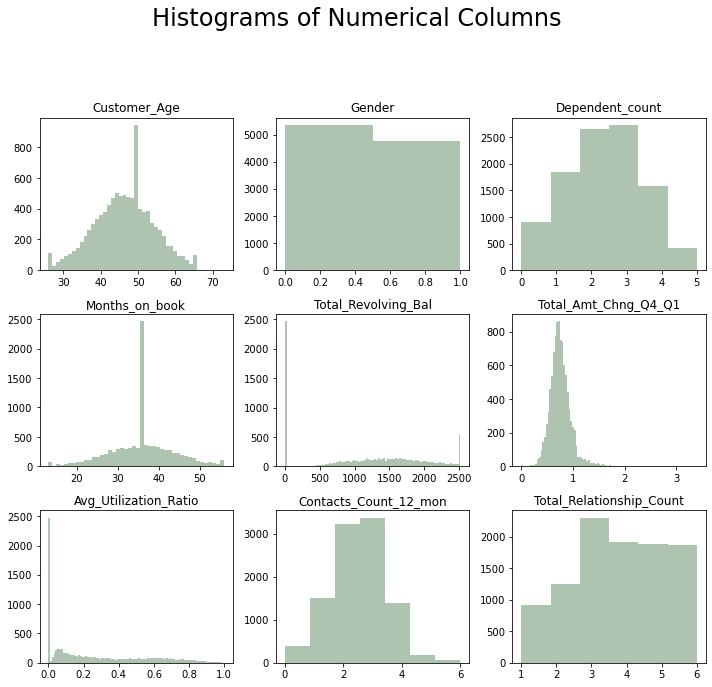

In [7]:
EDA_df = df[['Customer_Age',
             'Gender',
             'Dependent_count',
             'Months_on_book',
             'Total_Revolving_Bal',
             'Total_Amt_Chng_Q4_Q1',
             'Avg_Utilization_Ratio',
             'Contacts_Count_12_mon',
            'Total_Relationship_Count']]

    
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Histograms of Numerical Columns\n',
             horizontalalignment="center",
             fontstyle = "normal",
             fontsize = 24,
             fontfamily = "sans-serif")

for i in range(EDA_df.shape[1]):
    plt.subplot(3, 3, i + 1)
    f = plt.gca()
    f.set_title(EDA_df.columns.values[i])
    vals = np.size(EDA_df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(EDA_df.iloc[:, i], 
         bins=vals,
         color = '#AEC3B0')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

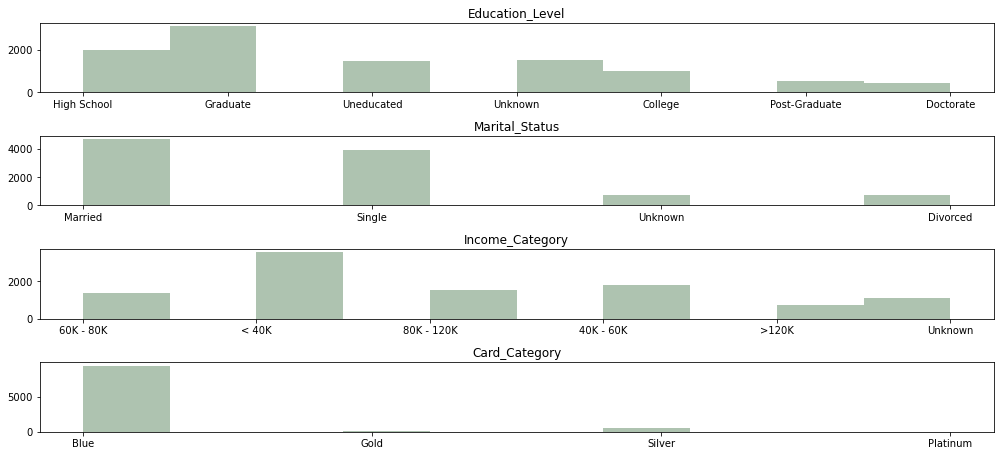

In [8]:
categories = ['Education_Level',
              'Marital_Status',
              'Income_Category',
              'Card_Category']

fig, ax = plt.subplots(4, figsize=(14, 7))

i = 0
for cat in categories:
    ax[i].hist(df[cat],color = '#AEC3B0')
    ax[i].set_title(cat)
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

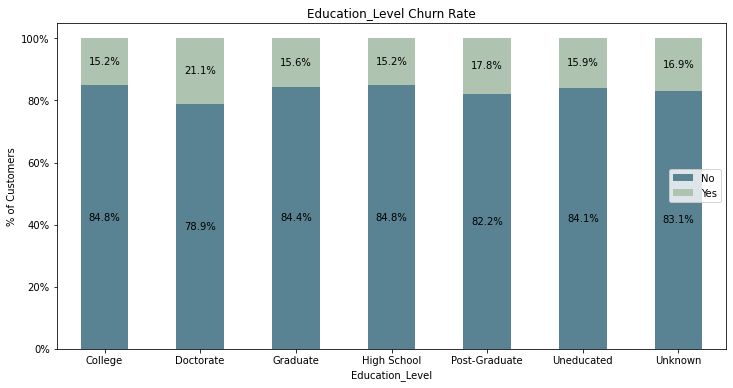

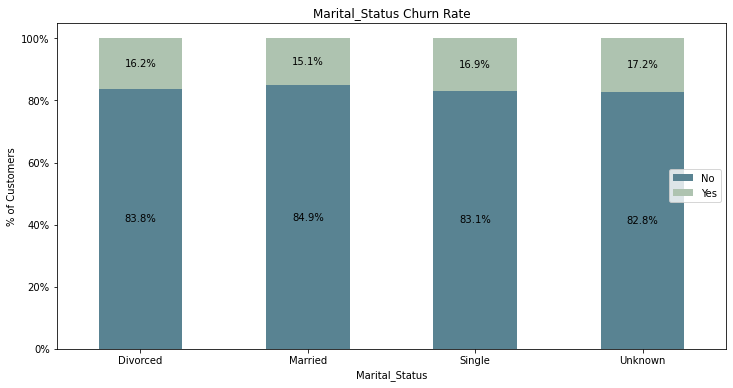

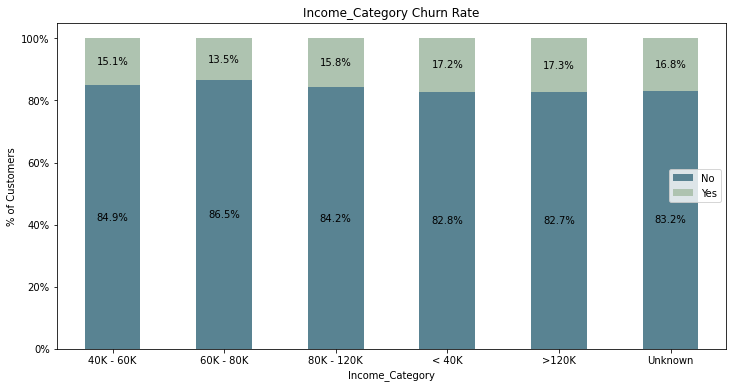

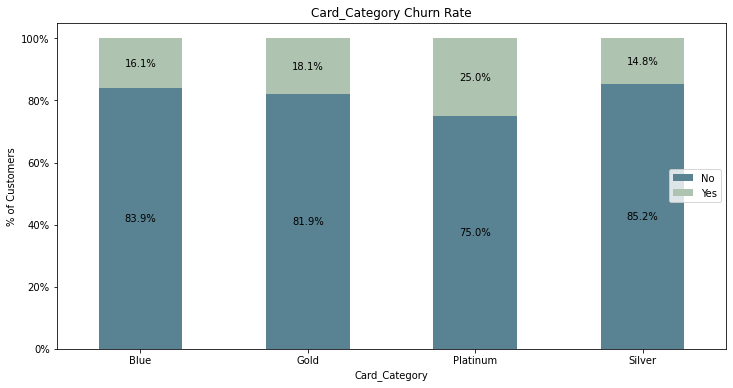

In [9]:
# Visualise churn rate by categories
categories = ['Education_Level','Marital_Status','Income_Category','Card_Category']

for cat in categories:
    temp_churn = df.groupby([cat,'churn']).size().unstack()
    temp_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
    colors  = ['#598392','#AEC3B0']

    ax = (temp_churn.T*100.0 / temp_churn.T.sum()).T.plot(
        kind='bar',
        figsize = (12,6),
        width = 0.5,
        stacked = True,
        color = colors)

    plt.ylabel('% of Customers')
    plt.xlabel(cat)
    plt.title(cat + ' Churn Rate')

    plt.legend(loc='right', fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

<AxesSubplot:>

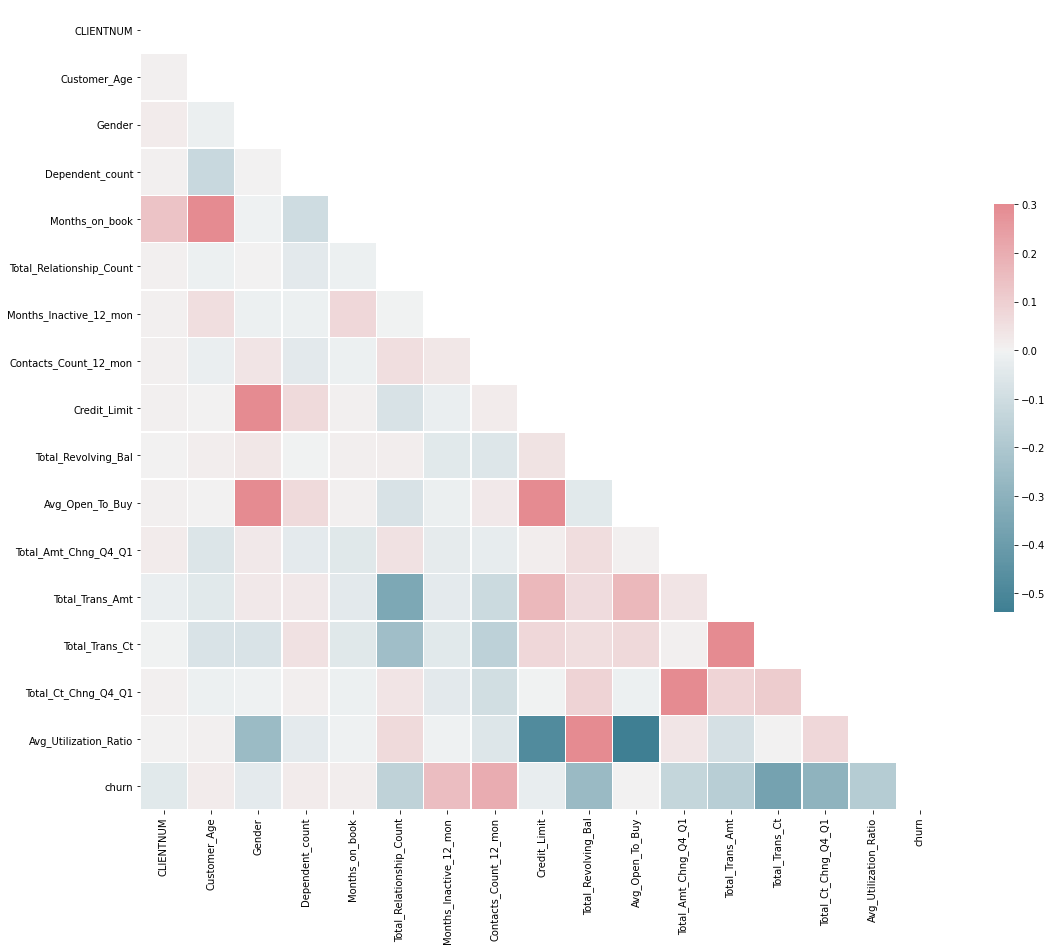

In [10]:
# Create a bivariate correlation plot

import seaborn as sn
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

#dataset2 = df.drop(['Customer_Age','Education_Level','Marital_Status','Income_Category','Card_Category','CLIENTNUM','Avg_Open_To_Buy','Total_Revolving_Bal','Credit_Limit'],axis=1)
#temp = calc_vif(dataset2)
#temp = temp[ temp['VIF'] > 10]
#temp.sort_values('VIF',ascending=False)

In [12]:
# One-hot encode the data
ID = df["CLIENTNUM"] #extract as we do not want to encode this unique identifier
df = df.drop(columns="CLIENTNUM")
df = pd.get_dummies(df)
df = pd.concat([df, ID], axis = 1)

# Split for training and test data
response = df["churn"]
df = df.drop(columns="churn")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response, stratify=response, test_size = 0.2)

In [13]:
train_identity = X_train['CLIENTNUM']
X_train = X_train.drop(columns = ['CLIENTNUM'])
test_identity = X_test['CLIENTNUM']
X_test = X_test.drop(columns = ['CLIENTNUM'])

In [14]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model Selection

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [16]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

acc_results = []
auc_results = []
precision = []
recall = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD','Recall','Precision']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    # Precision & Recall
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    precision.append(precision_score(y_test, pred))
    recall.append(recall_score(y_test, pred))
    # Storing Results
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100, 2),
                        round(cv_auc_results.std()*100, 2),
                        round(cv_acc_results.mean()*100, 2),
                        round(cv_acc_results.std()*100, 2),
                        round(recall[i]*100, 2),
                        round(precision[i]*100, 2)]
    i += 1

In [17]:
recall

[0.8861538461538462,
 0.6215384615384615,
 0.6246153846153846,
 0.38153846153846155,
 0.6430769230769231,
 0.8584615384615385,
 0.8307692307692308]

[0.03091489 0.01381604 0.02598693 0.02939764 0.06876056 0.03797896
 0.04643812 0.03109451 0.10674324 0.03006736 0.04377155 0.11195974
 0.15264412 0.07037498 0.04568103 0.00832603 0.00641461 0.01248042
 0.01129307 0.00591129 0.00923716 0.01031412 0.0061908  0.01249024
 0.01182772 0.00643666 0.00827949 0.00645003 0.00742941 0.00955017
 0.00539711 0.00615468 0.00439513 0.00201686 0.00049778 0.00327754]


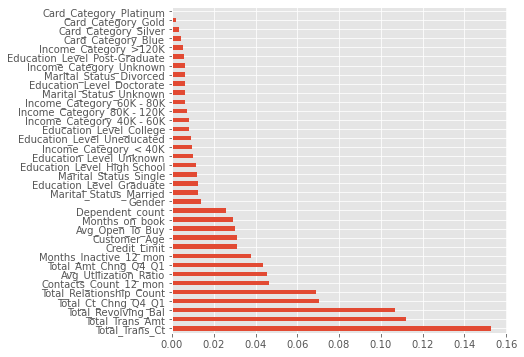

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [19]:
test = ['CLIENTNUM',
        'Total_Trans_Ct',
        'Total_Trans_Amt',
        'Total_Ct_Chng_Q4_Q1',
        'Total_Relationship_Count',
       'Avg_Utilization_Ratio',
       'Contacts_Count_12_mon',
       'Total_Amt_Chng_Q4_Q1']

In [20]:
# Split for training and test data
df = df[test]

X_train, X_test, y_train, y_test = train_test_split(df, response, stratify=response, test_size = 0.2)

train_identity = X_train['CLIENTNUM']
X_train = X_train.drop(columns = ['CLIENTNUM'])
test_identity = X_test['CLIENTNUM']
X_test = X_test.drop(columns = ['CLIENTNUM'])

In [21]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [22]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

acc_results = []
auc_results = []
precision = []
recall = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD','Recall','Precision']
model_results2 = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    # Precision & Recall
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    precision.append(precision_score(y_test, pred))
    recall.append(recall_score(y_test, pred))
    # Storing Results
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results2.loc[i] = [name,
                        round(cv_auc_results.mean()*100, 2),
                        round(cv_auc_results.std()*100, 2),
                        round(cv_acc_results.mean()*100, 2),
                        round(cv_acc_results.std()*100, 2),
                        round(recall[i]*100, 2),
                        round(precision[i]*100, 2)]
    i += 1

In [23]:
model_results.sort_values(by=['Recall'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Recall,Precision
0,Logistic Regression,92.09,1.41,84.24,0.89,88.62,52.08
5,Decision Tree Classifier,88.59,1.31,93.77,0.46,85.85,84.80
6,Random Forest,98.79,0.27,95.62,0.37,83.08,94.08
4,Gaussian NB,85.85,2.04,87.45,1.02,64.31,61.65
2,Kernel SVM,94.20,1.06,91.33,0.70,62.46,85.29
1,SVC,91.42,1.49,90.30,0.96,62.15,79.53
3,KNN,77.61,1.57,86.47,1.10,38.15,74.70
